# Action Potentials in Neurons

In [1]:
%matplotlib inline
from ecell4.prelude import *

## Hodgkin-Huxley Model

In [2]:
citation(12991237)

HODGKIN AL, HUXLEY AF, A quantitative description of membrane current and its application to conduction and excitation in nerve. *The Journal of physiology*, **4**(117), 500-44, 1952. [10.1113/jphysiol.1952.sp004764](https://doi.org/10.1113/jphysiol.1952.sp004764). PubMed PMID: [12991237](https://www.ncbi.nlm.nih.gov/pubmed/12991237).

In [3]:
Q10 = 3.0
GNa = 120.0 # mS/cm^2
GK = 36.0 # mS/cm^2
gL = 0.3 # mS/cm^2
EL = -64.387 # mV
ENa = 40.0 # mV
EK = -87.0 # mV
Cm = 1.0 # uF/cm^2

T = 6.3 # degrees C
Iext = 10.0 # nA

with reaction_rules():
    Q = Q10 ** ((T - 6.3) / 10)

    alpha_m = -0.1 * (Vm + 50) / (exp(-(Vm + 50) / 10) - 1)
    beta_m = 4 * exp(-(Vm + 75) / 18)
    ~m > m | Q * (alpha_m * (1 - m) - beta_m * m)

    alpha_h = 0.07 * exp(-(Vm + 75) / 20)
    beta_h = 1.0 / (exp(-(Vm + 45) / 10) + 1)
    ~h > h | Q * (alpha_h * (1 - h) - beta_h * h)

    alpha_n = -0.01 * (Vm + 65) / (exp(-(Vm + 65) / 10) - 1)
    beta_n = 0.125 * exp(-(Vm + 75) / 80)    
    ~n > n | Q * (alpha_n * (1 - n) - beta_n * n)

    gNa = (m ** 3) * h * GNa
    INa = gNa * (Vm - ENa)
    gK = (n ** 4) * GK
    IK = gK * (Vm - EK)
    IL = gL * (Vm - EL)
    ~Vm > Vm | (Iext - (IL + INa + IK)) / Cm

hhm = get_model()

In [4]:
show(hhm)


Vm > m + Vm | (1.0 * ((((-0.1 * (Vm + 50)) / (exp((-(Vm + 50) / 10)) - 1)) * (1 - m)) - (4 * exp((-(Vm + 75) / 18)) * m)))
Vm > h + Vm | (1.0 * ((0.07 * exp((-(Vm + 75) / 20)) * (1 - h)) - ((1.0 / (exp((-(Vm + 45) / 10)) + 1)) * h)))
Vm > n + Vm | (1.0 * ((((-0.01 * (Vm + 65)) / (exp((-(Vm + 65) / 10)) - 1)) * (1 - n)) - (0.125 * exp((-(Vm + 75) / 80)) * n)))
m + h + n > Vm + m + h + n | ((10.0 - ((0.3 * (Vm - -64.387)) + (pow(m, 3) * h * 120.0 * (Vm - 40.0)) + (pow(n, 4) * 36.0 * (Vm - -87.0)))) / 1.0)


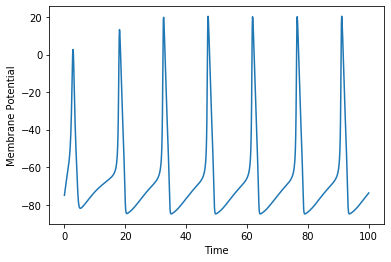

In [5]:
ret = run_simulation(100, ndiv=1000, model=hhm, y0={'Vm': -75})
ret.plot(y="Vm", ylabel="Membrane Potential")

## FitzHugh–Nagumo Model

FitzHugh R, Mathematical models of threshold phenomena in the nerve membrane. *Bull. Math. Biophysics*, **17**, 257—278, 1955.

In [6]:
a = 0.7
b = 0.8
c = 12.5
Iext = 0.5

with reaction_rules():
    ~u > u | -v + u - (u ** 3) / 3 + Iext
    ~v > v | (u - b * v + a) / c

fnm = get_model()

In [7]:
show(fnm)


v > u + v | (((-v + u) - (pow(u, 3) / 3)) + 0.5)
u > v + u | (((u - (0.8 * v)) + 0.7) / 12.5)


In [8]:
ret = run_simulation(200, ndiv=501, model=fnm)

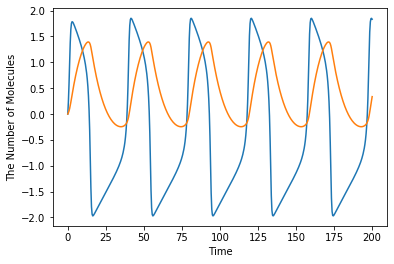

In [9]:
ret

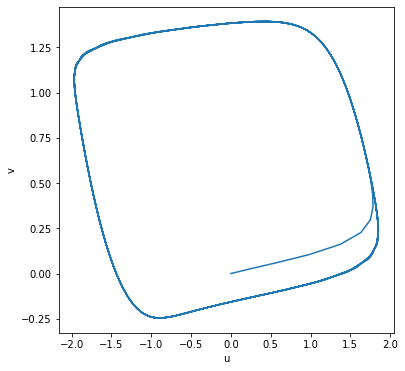

In [10]:
ret.plot(x='u', y='v', xlabel='u', ylabel='v', figsize=[6.0, 6.0])